In [1]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21, by alistairskirk
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
"""
## Prepare the data
"""
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [7]:
"""
## Train the model
"""

batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0319 - accuracy: 0.9892 - val_loss: 0.0286 - val_accuracy: 0.9923
Epoch 2/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0292 - accuracy: 0.9899 - val_loss: 0.0281 - val_accuracy: 0.9930
Epoch 3/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 4/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0322 - val_accuracy: 0.9915
Epoch 5/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.0301 - val_accuracy: 0.9928
Epoch 6/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0312 - val_accuracy: 0.9922
Epoch 7/25
422/422 [==============================] - 7s 16ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.0298 - val_accuracy: 0.9930

In [8]:
"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022578665986657143
Test accuracy: 0.9929999709129333


Analyzing, 10 images


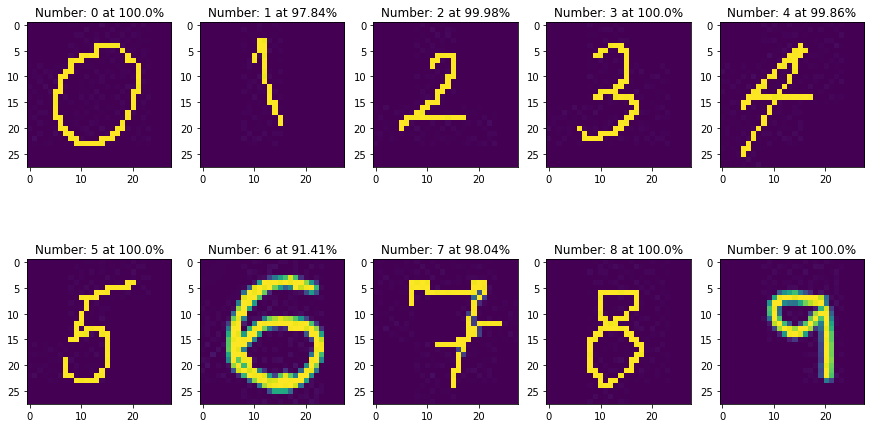

In [10]:
folder="test/" # test images
images = []
for filename in os.listdir(folder):
    img_ = cv2.imread(os.path.join(folder,filename),0) #using 0 for grayscale read in, maybe dont invert?
    if ((img_ is not None)&(filename.endswith('.jpg'))):
        images.append(img_)
print("Analyzing, {:s} images".format(str(len(images))))

image_set = []      
for img in images:
    #img = image.load_img(img_path, target_size=(28, 28), color_mode = 'grayscale')
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    #print(img_tensor)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    img_tensor = 1 - img_tensor                             # invert the matrix values 1->0, 0->1 because import grayscale inverts image
    image_set.append(img_tensor)

f, ax = plt.subplots(2,round(len(images)/2),figsize=(15,8)) 

idx = -1
row = 0

for img_tensor in image_set:
    #plt.imshow(img_tensor[0])                           
    #plt.axis('off')
    #plt.show()
    #print(idx)
    if (idx>=round(len(images)/2)-1):
        idx = 0
        row+=1
    else: idx+=1
    #print(idx)    
    ax[row,idx].imshow(img_tensor[0]-1)
    
    predmatrix = model.predict(img_tensor)
    #print("Number: ",np.argmax(predmatrix))
    #print("with {:.3}".format(np.max(predmatrix)*100),'% conf.')
    title_string = "Number: "+str(np.argmax(predmatrix))+" at {:.4}".format(np.max(predmatrix)*100)+'%'
    ax[row,idx].set_title(title_string)
